# Pymaceuticals Inc.
---

### Analysis

- Tumor sizes increased over the periodic timepoints (days).
- Ramicane and Capomulin have the lowest mean and median tumor growth statistics whiule they both had the most timepoints.
- The mice weights had an impact on the tumor volumes (the more weight the larger the tumor volume.)

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
unique_mice = df['Mouse ID'].nunique()
print(unique_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
index_df = df.set_index('Mouse ID')

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
index_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = index_df.drop(['g989'])
clean_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,0,45.000000,0
a203,Infubinol,Female,20,23,5,48.508468,0
a203,Infubinol,Female,20,23,10,51.852437,1
a203,Infubinol,Female,20,23,15,52.777870,1
a203,Infubinol,Female,20,23,20,55.173336,1


In [6]:
# Created a dataframe that reset the index 'Mouse ID' as a column just in case we need it later.
# Used .reset_index()
clean_df2 = clean_df.reset_index()
# Checking the number of mice in the clean DataFrame.
clean_df2['Mouse ID'].value_counts()
print(clean_df2['Mouse ID'].nunique())

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor = clean_df2.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = tumor['Tumor Volume (mm3)'].mean()
tumor_med = tumor['Tumor Volume (mm3)'].median()
tumor_var = tumor['Tumor Volume (mm3)'].var()
tumor_std = tumor['Tumor Volume (mm3)'].std()
tumor_sem = tumor['Tumor Volume (mm3)'].sem()

tumor_df = pd.DataFrame({
                        "Mean Tumor Volume": tumor_mean,
                        "Median Tumor Volume" : tumor_med,
                        "Tumor Volume Variance" : tumor_var,
                        "Tumor Volume St. Dev." : tumor_std,
                        "Tumor Volume St. Err." : tumor_sem
                        })
tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume St. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# used function .agg() on the Tumor panda series and applied the aggregation functions required
tumor2 = clean_df2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

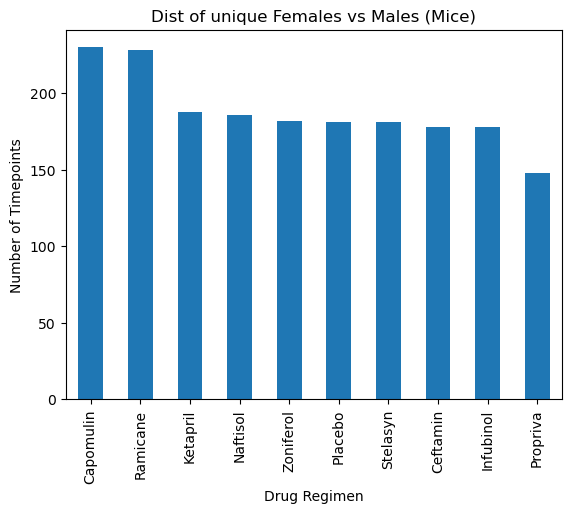

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint = clean_df2.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint.sort_values(ascending=False).plot.bar()  
plt.ylabel('Number of Timepoints', size=10)

#title of Bar graph
plt.title('Dist of unique Females vs Males (Mice)')
plt.show()

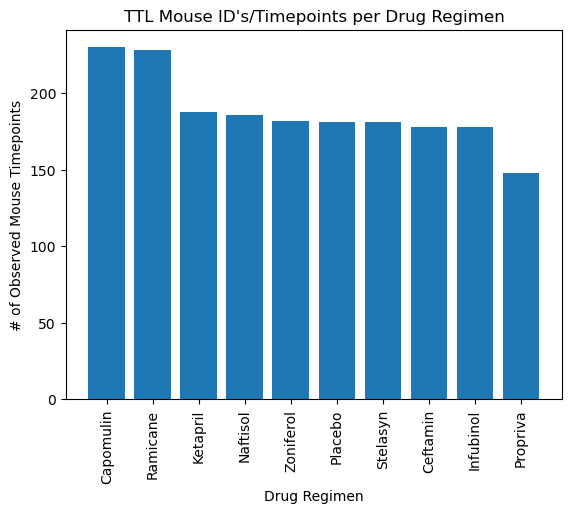

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#first, sorted values:
timepoint_desc = timepoint.sort_values(ascending=False)

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = timepoint_desc.index.values
y_axis = timepoint_desc.values
plt.bar(x_axis, y_axis)

#create labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.title("TTL Mouse ID's/Timepoints per Drug Regimen")
plt.show()

<Axes: title={'center': 'Dist of unique Females vs Males (Mice)'}, ylabel='Sex'>

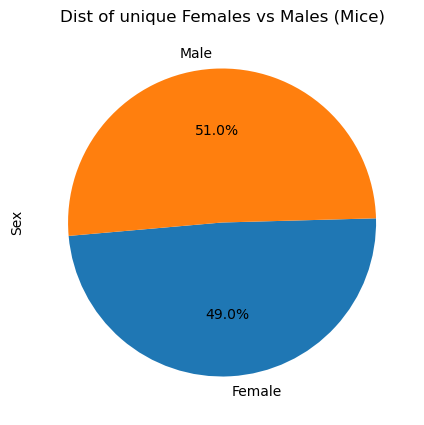

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex = clean_df2.groupby(['Sex'])['Sex'].count()

#title of Line graph
plt.title('Dist of unique Females vs Males (Mice)')

# Make the pie chart
sex.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(5, 5))

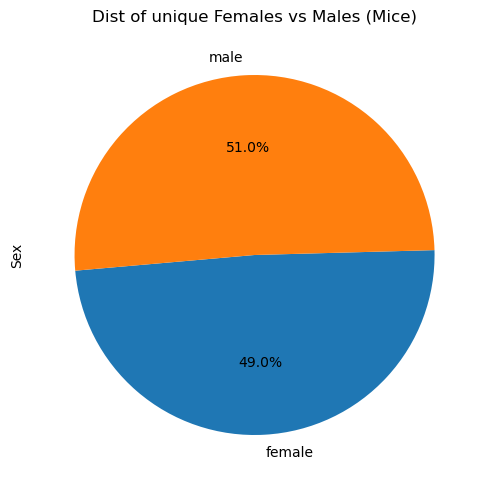

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
plt.pie(sex, labels=('female', 'male'), startangle=185, autopct='%1.1f%%')

# Labels
plt.ylabel('Sex')
plt.tight_layout()

#title of Line graph
plt.title('Dist of unique Females vs Males (Mice)')

# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tm = clean_df2.groupby(['Mouse ID'])['Timepoint'].max()
last_tm_df = pd.DataFrame(last_tm)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_df = pd.merge(clean_df2, last_tm_df, on=('Mouse ID', 'Timepoint'), how='right')
last_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
    

    # add subset
drug_df = pd.DataFrame({"Capomulin": tumor_cap,
                       treatments[1]: tumor_ram,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef
                       })

    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()
drug_df


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


<function matplotlib.pyplot.show(close=None, block=None)>

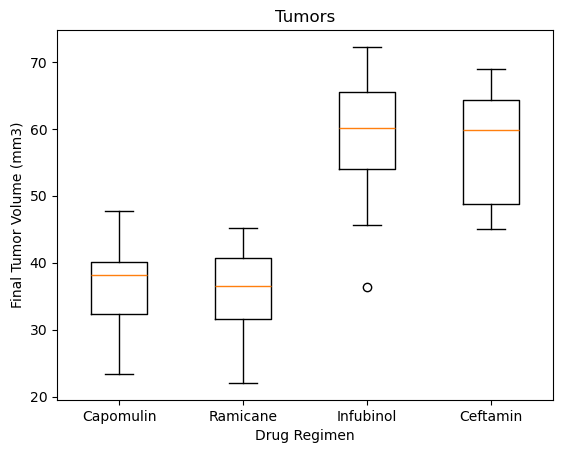

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
data_to_plot = [tumor_cap, tumor_ram, tumor_inf, tumor_cef]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('whiskerplot')
plt.show

## Line and Scatter Plots

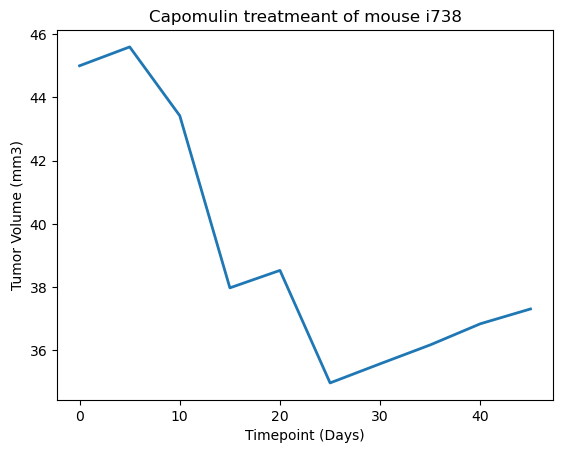

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = clean_df2.loc[clean_df2["Mouse ID"] == "i738",:]
line_df

# X axis
x_axisTP = line_df["Timepoint"] 

# Y axis
tumsiz = line_df["Tumor Volume (mm3)"] 

#title of Line graph
plt.title('Capomulin treatmeant of mouse i738')

# the plot function plt.plot() with x and y values and customizations
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = last_df.loc[last_df["Drug Regimen"] == "Capomulin",:]
cap_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

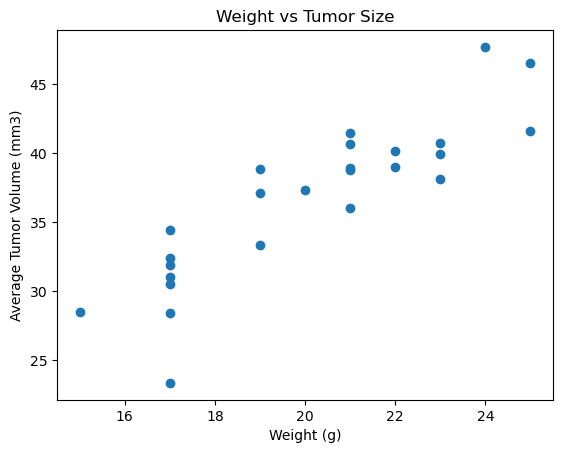

In [18]:
# created scatter plot of the x axis (weight) and the y axis (tumor size) by calling from the capavg dataframe
plt.scatter(cap_df['Weight (g)'],cap_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#title of Scatter graph
plt.title('Weight vs Tumor Size')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = round(st.pearsonr(cap_df['Weight (g)'],cap_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.88


In [20]:
# calculating linear regression values using st.linregress() function passing parameters from the capavg dataframe
model=st.linregress(cap_df['Weight (g)'],cap_df['Tumor Volume (mm3)'])
model

LinregressResult(slope=1.750468228958504, intercept=1.4481469525549002, rvalue=0.8767060403658119, pvalue=9.084429088673217e-09, stderr=0.20026513236453639, intercept_stderr=4.068291402922092)

In [21]:
# defined slope of regression line using the linregress results
# defined the y-intercept using the linregress results
slope = 0.9544396890241045
intercept = 21.552160532685015

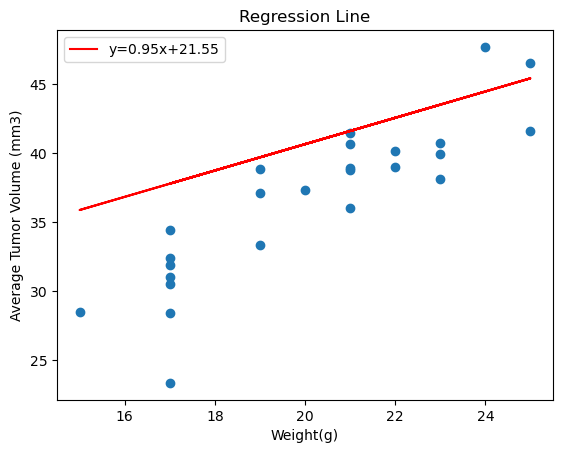

In [22]:
# ploting the regression line
# calculate the the linear line plot list of values
line = slope*(cap_df['Weight (g)'])+intercept
# create the scatter plot like above
plt.scatter(cap_df['Weight (g)'],cap_df['Tumor Volume (mm3)'])
# plot the linear regression line which is the averaged line of all the values in red
# i used the .format() function to create a label of the red line using the slope and intercept from above
plt.plot(cap_df['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title('Regression Line')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
# included legend with the redline slope formula using plt.legend()
plt.legend()
plt.savefig('linearregression')
plt.show()